In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,True,0.0,...,-122.257,1340,5650,65,65,False,12.251612,8.232375,0.880597,1.000000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,-122.319,1690,7639,69,29,True,12.613856,30.859494,1.520710,0.948030
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,-122.233,2720,8062,87,87,False,16.333282,33.112379,0.283088,1.240387
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,-122.393,1360,5000,55,55,True,10.617501,10.988905,1.441176,1.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,-122.045,1800,7503,33,33,False,21.759524,27.230991,0.933333,1.076903


In [4]:
df.corr()['price']

id                       -0.016772
price                     1.000000
bedrooms                  0.308787
bathrooms                 0.525906
sqft_living               0.701917
sqft_lot                  0.089876
floors                    0.256804
waterfront                0.057305
view                      0.393497
condition                 0.036056
grade                     0.667951
sqft_above                0.605368
sqft_basement             0.321108
yr_built                  0.053953
yr_renovated              0.097541
zipcode                  -0.053402
lat                       0.306692
long                      0.022036
sqft_living15             0.585241
sqft_lot15                0.082845
Age_of_House             -0.053953
Years_last_renovation    -0.097541
basement                  0.178264
distance_from_city       -0.286476
distance_from_airport     0.158936
sqft_living_comparison    0.301957
sqft_lot_comparison       0.041796
Name: price, dtype: float64

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_city',
       'distance_from_airport', 'sqft_living_comparison',
       'sqft_lot_comparison'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 28 columns):
id                        21597 non-null int64
date                      21597 non-null object
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms                 21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                21597 non-null bool
view                      21597 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21597 non-null float64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null int64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                      21597 n

In [7]:
df.drop(columns = ['lat','long','yr_built','yr_renovated','sqft_above','sqft_basement'],axis = 1, inplace = True)

In [8]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(19,
 ['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'view',
  'condition',
  'grade',
  'zipcode',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_city',
  'distance_from_airport',
  'sqft_living_comparison',
  'sqft_lot_comparison'])

In [9]:
numerical_cols.remove('id')

In [10]:
numerical_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

In [11]:
numericals = numerical_cols.remove('price')

# SalesPrice Distribution


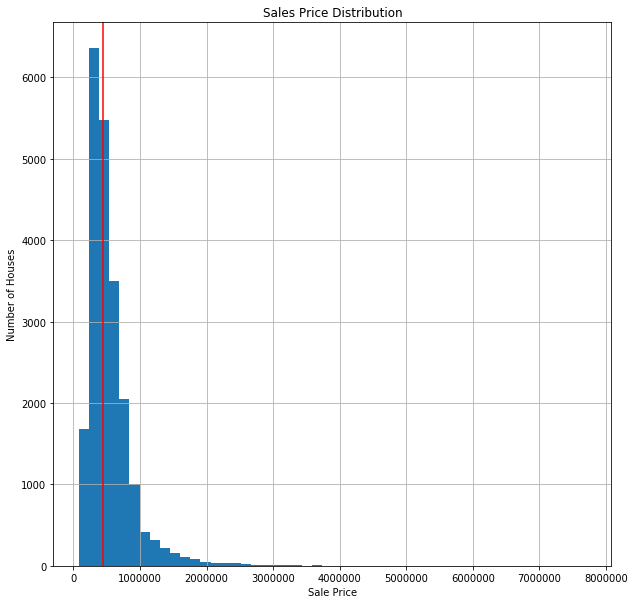

In [12]:

salesprice = df["price"]
salesprice.hist(figsize=(10,10),bins = 50);
plt.title("Sales Price Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Number of Houses");
plt.axvline(salesprice.median(), color = 'red');

# Home Value over the Decades

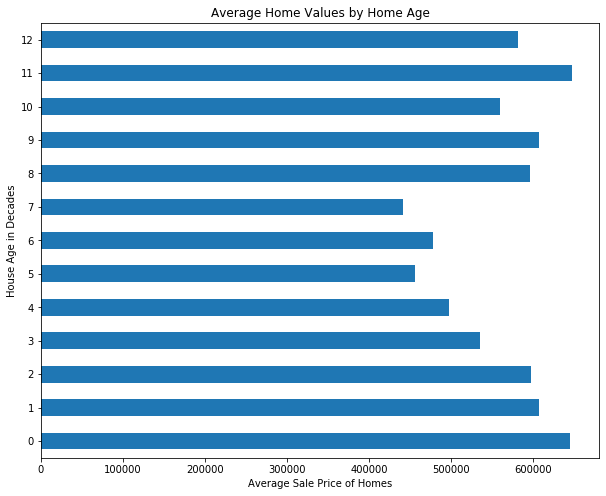

In [13]:

df['decades'] = df['Age_of_House']//10
to_plot = df.groupby('decades')['price'].mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Sale Price of Homes')
plt.title('Average Home Values by Home Age');


 # Price by Condition

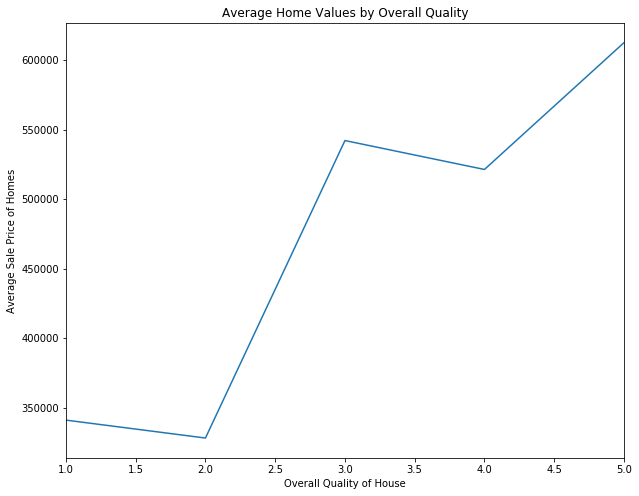

In [14]:
to_plot1 = df.groupby('condition').price.mean()
to_plot1.plot(kind='line', figsize=(10,8))

plt.xlabel('Overall Quality of House')
plt.ylabel('Average Sale Price of Homes')
plt.title('Average Home Values by Overall Quality');

# House Size vs Price with Basement Hue

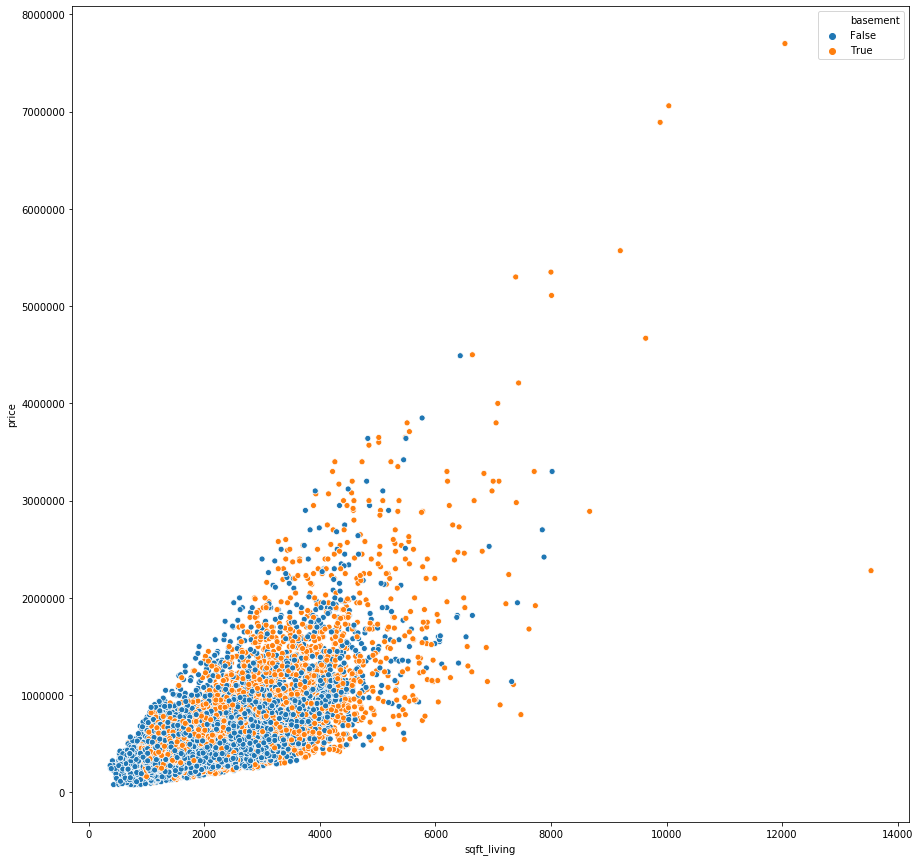

In [15]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'basement')
plt.show()

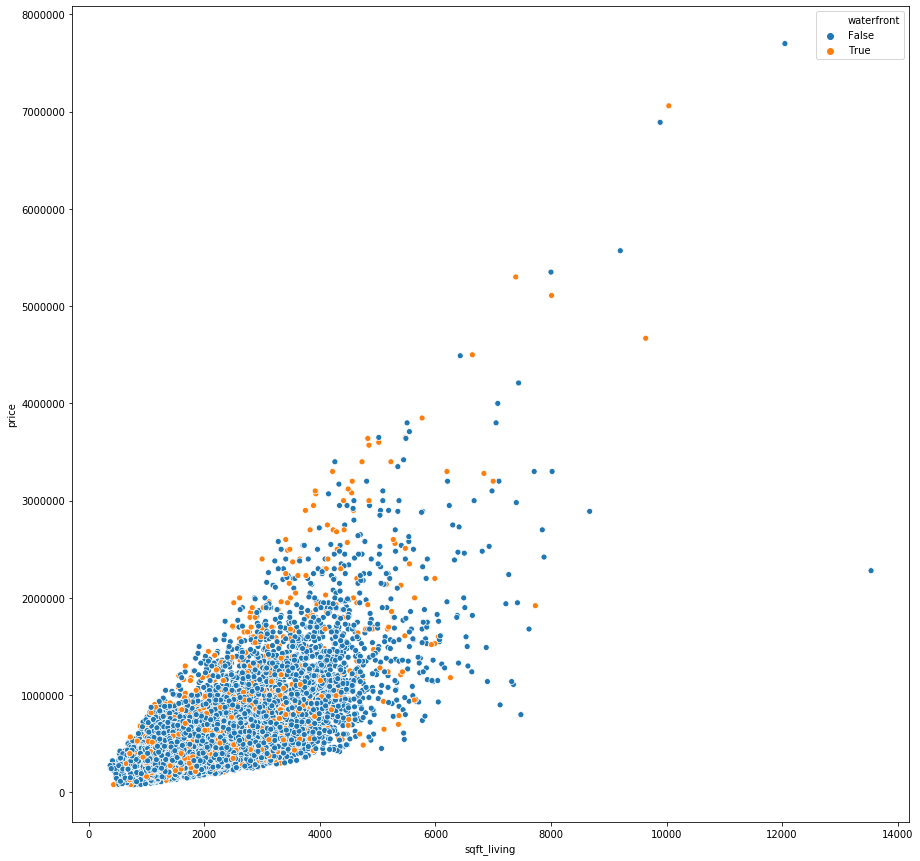

In [16]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'waterfront')
plt.show()

# Distance From City (Seattle) vs House Price

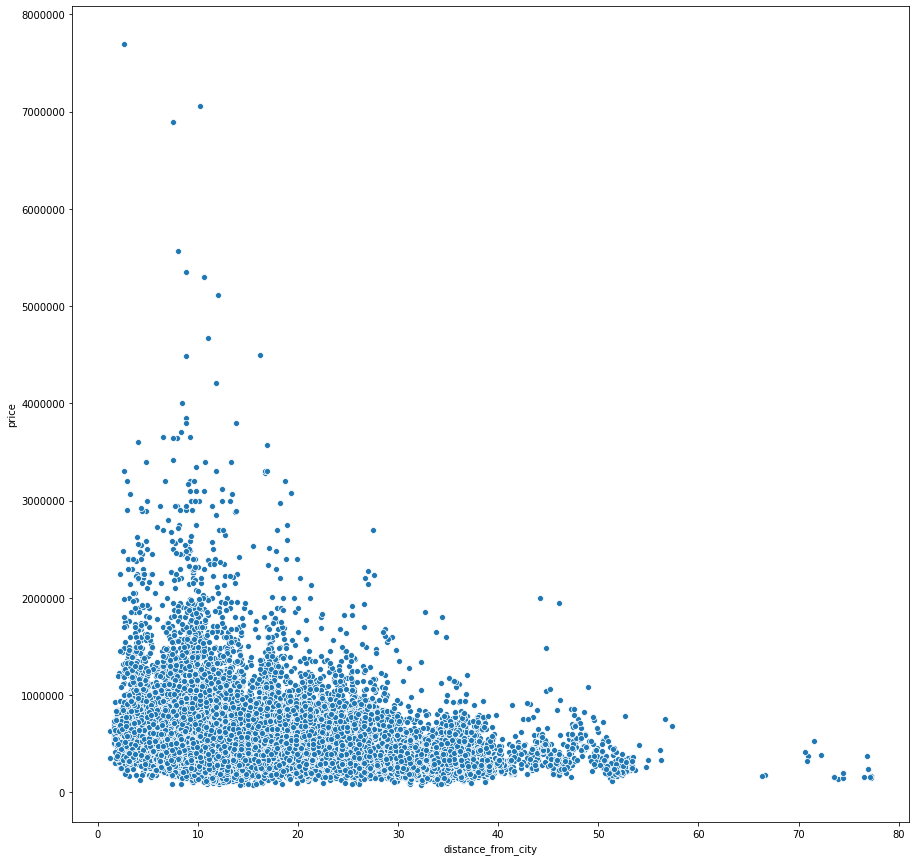

In [17]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_city', y='price',data=df)
plt.show()

# Distance From International Airport vs House Price


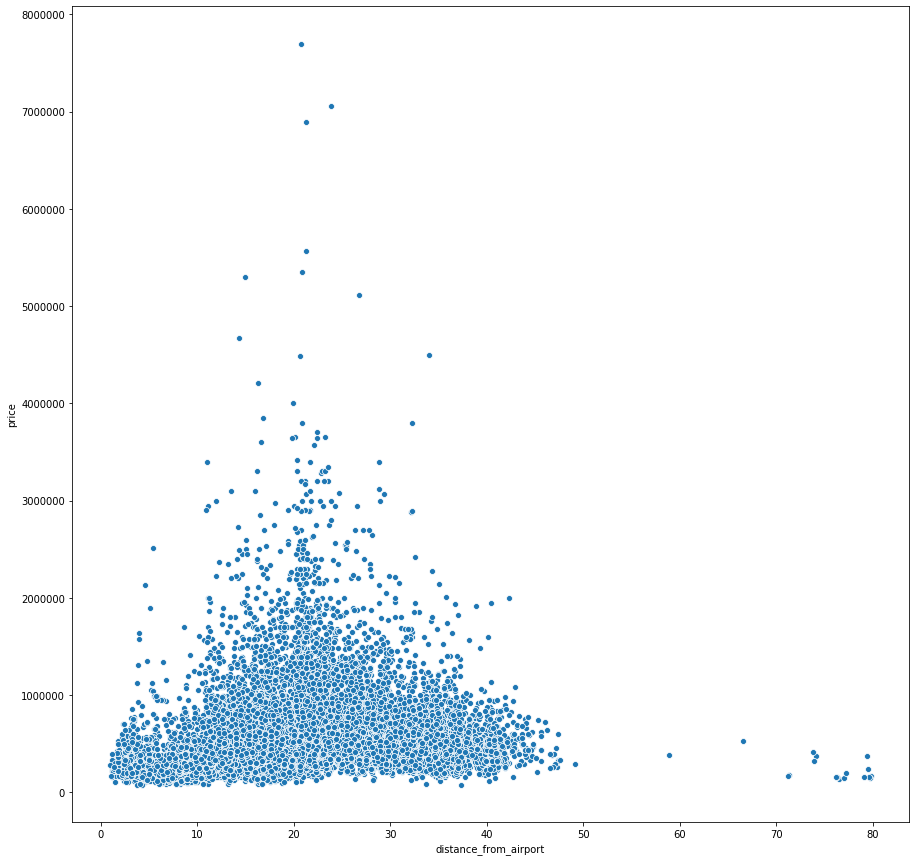

In [18]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_airport', y='price',data=df)
plt.show()

**The house prices are cheapest from 0 -10km, then increase from 10 to 30 before decreasing again**

This is as expected
* Too close to aiport and noise drives prices down
* Too far from aiport - 30+km also drive down price
* Sweet spot seems to be between 10 and 30 km

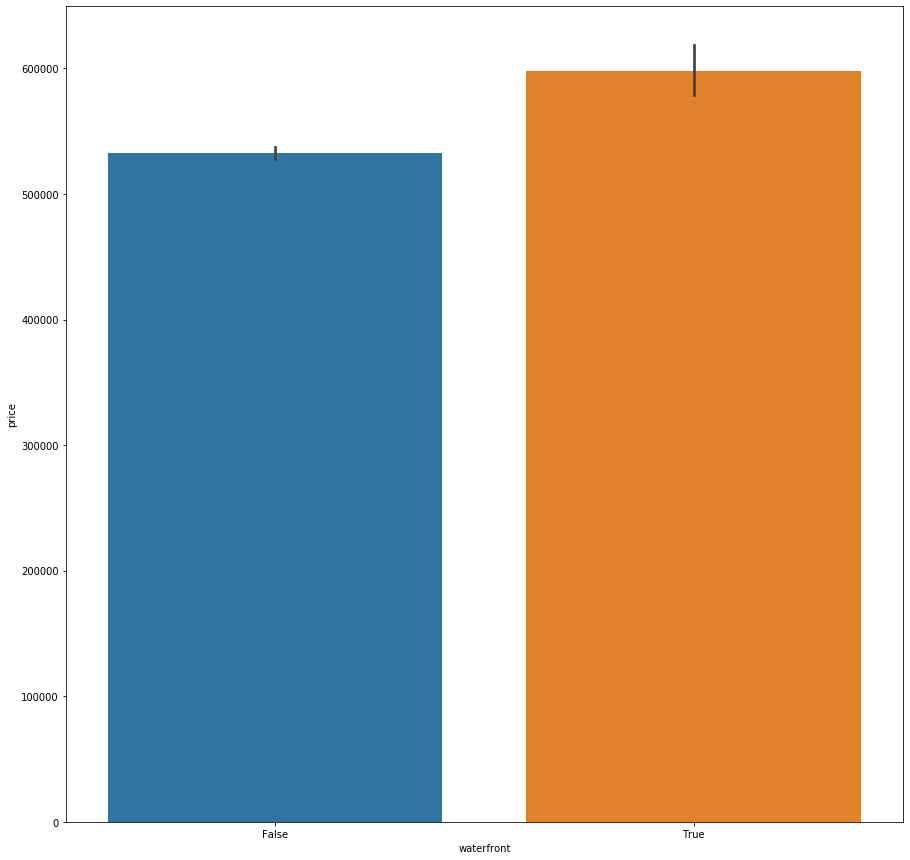

In [19]:
plt.figure(figsize= (15,15))
sns.barplot(x='waterfront', y='price',data=df)
plt.show()

# Age of House vs Price

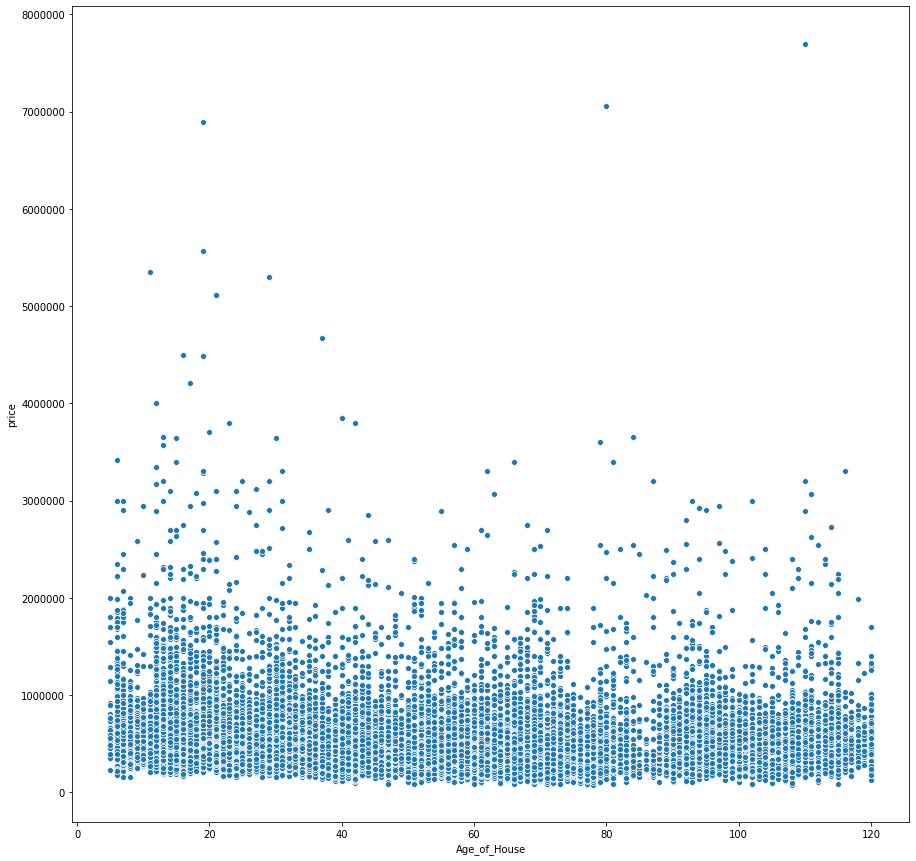

In [20]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Age_of_House', y='price',data=df)
plt.show()

# Last Renovated vs House Price

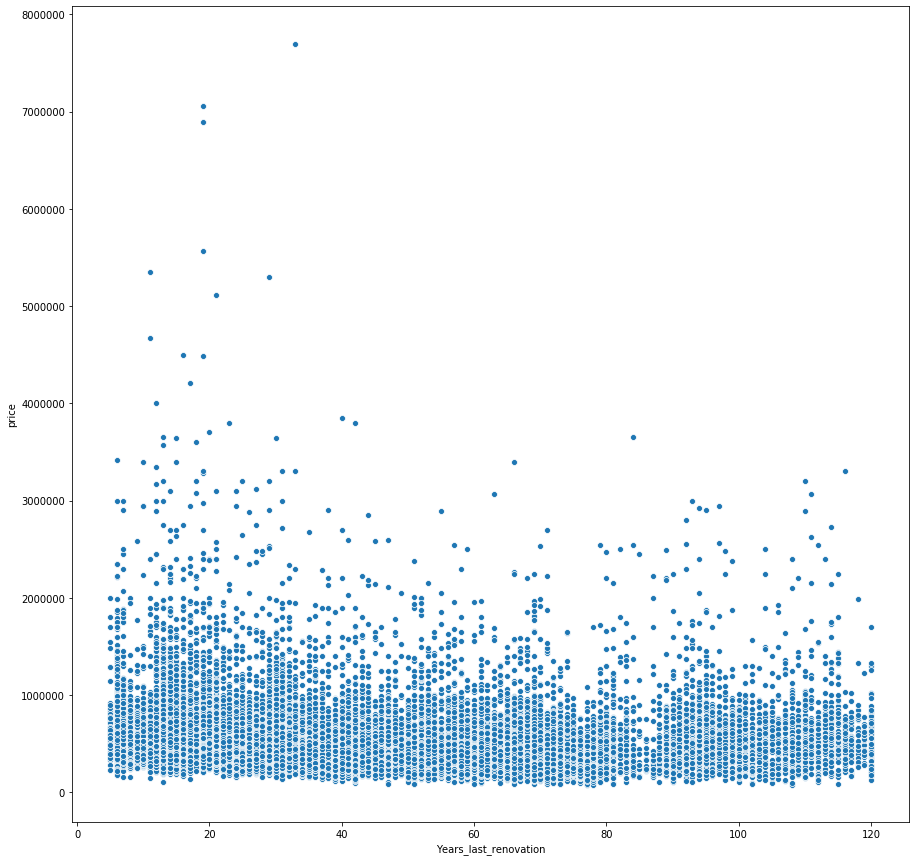

In [21]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Years_last_renovation', y='price',data=df)
plt.show()

# 10 Cheapest Zipcodes by House Price

In [25]:
import matplotlib as mpl

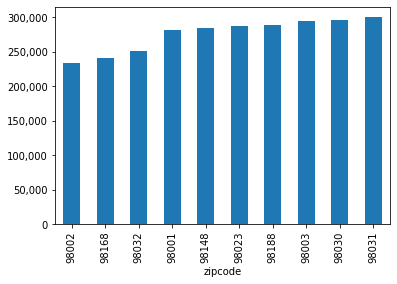

In [26]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = True)[:10].plot(kind='bar')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 10 Expensive Zipcodes by House Price

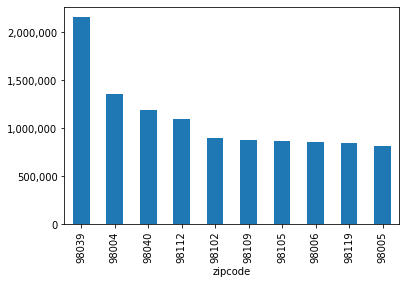

In [27]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = False)[:10].plot(kind='bar')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

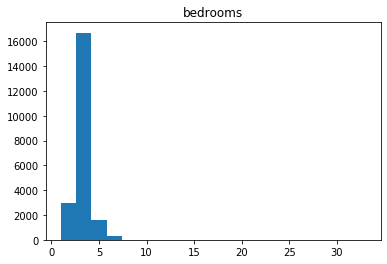

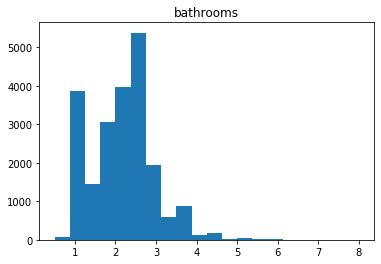

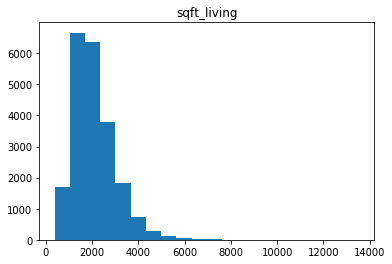

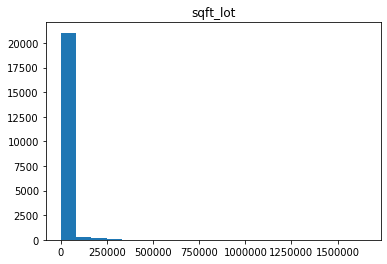

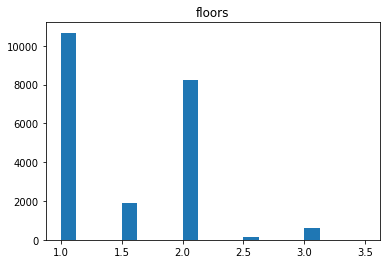

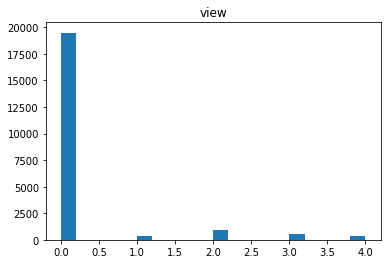

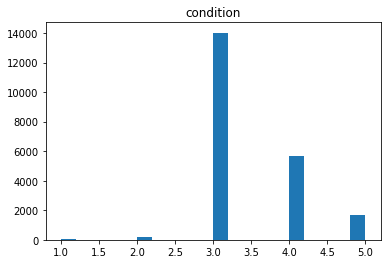

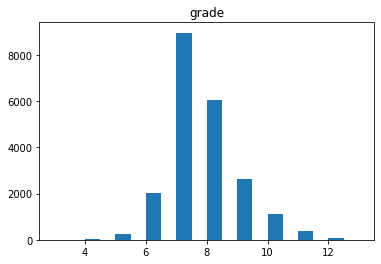

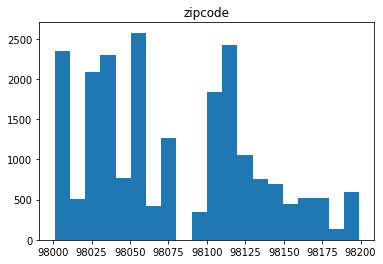

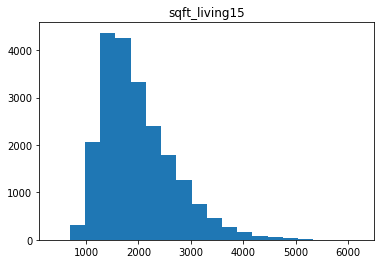

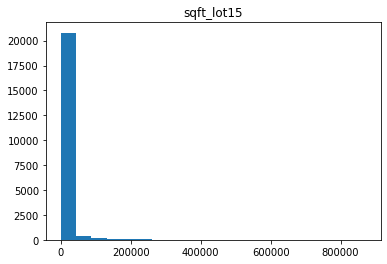

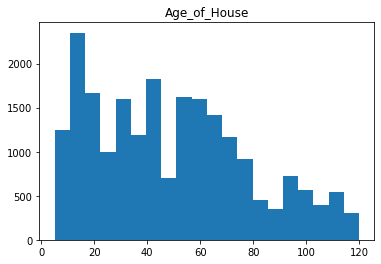

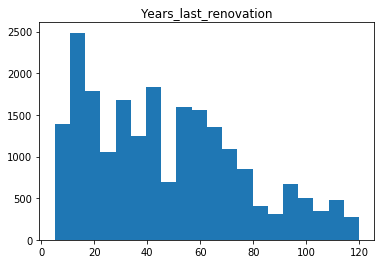

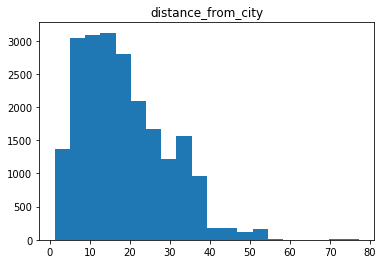

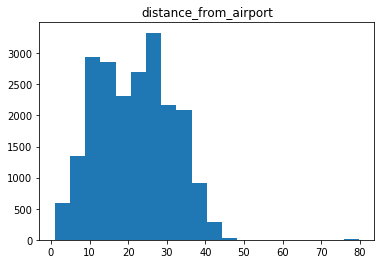

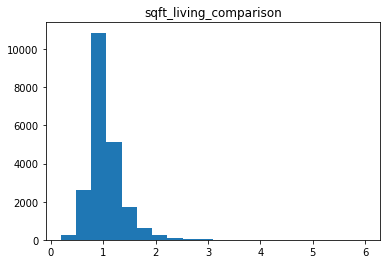

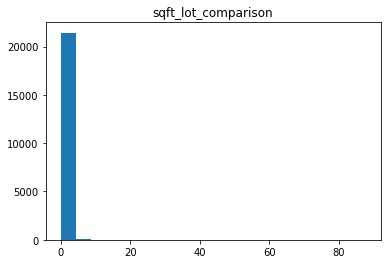

In [28]:
for col in numerical_cols:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()


**From the above histogram can see a view of the columns should be categorical**

In [ ]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

# Viewing Categorical Variables

In [ ]:

# Create bar plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
for xcol, ax in zip(categoricals, axes.flatten()):
    df.groupby(xcol)['price'].sum().plot(kind='bar',ax=ax)
#     df.groupby(xcol)['price'].mean().plot(kind='bar',ax=ax,)


In [ ]:
# PLotting ZIpcodes by price

In [ ]:
plt.figure(figsize=(20,20))
df.groupby('zipcode')['price'].mean().sort_values().plot(kind='barh')

In [ ]:
df['waterfront'].value_counts()

In [ ]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

# Correlation between Variables

In [ ]:
corr = df[numericals].corr()

In [ ]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [ ]:
df_cont = df[numericals]
df_cont.head()
df_cont.hist(figsize = (20,20))
plt.show()

In [ ]:
totransform = ['bathrooms','bedrooms','distance_from_city','sqft_living','sqft_living15','sqft_living_comparison',
             'sqft_lot','sqft_lot15','sqft_lot_comparison']
df_transform = df[totransform]


In [ ]:
import numpy as np

In [ ]:
df['bathroomlog'] = np.log(df['bathrooms'])

In [ ]:
numericals.remove('price')

In [ ]:
numericals

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='Age_of_House',data=df,hue='basement')

In [ ]:
dftop1000 = df.sort_values(by='price',ascending = False)[:1000]

In [ ]:
df['zipcode'].value_counts()

In [ ]:
df['distance_from_airport'].hist()

In [ ]:
airport = df['distance_from_airport']

In [ ]:
bc_airport = scs.boxcox(airport.values)
bc_aiport

In [ ]:
bc_airport.hist()
plt.show()

In [ ]:
df['distance_from_airport']

In [ ]:
df['log_dist_from_airport'].hist()

In [ ]:

dfzip = df.groupby('zipcode')['price'].agg(['mean','median','count'])

In [ ]:
dfzip.reset_index(inplace = True)

In [ ]:
dfzip.info()

In [ ]:
dfzip['mean'] = dfzip['mean'].astype('int64')
dfzip['median'] = dfzip['median'].astype('int64')

In [ ]:
df.corr()

In [ ]:
dfzip

# Linearity

In [ ]:
for col in numerical_cols:
    sns.jointplot(x = col,y ='price',data=df, kind='reg')